In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Company Name,Founded,Industry,Job Description,Job Title,Location,Rating,Revenue,Salary Estimate,Sector,...,finance,modeling,statistics,vba,C++,portfolio_theory,derivatives,trading,data_science,sql
0,Cogo Labs\r\n3.6,2005,Internet,"At Cogo Labs, we build startup companies from ...",Quantitative Data Analyst,"Cambridge, MA",3.6,Unknown / Non-Applicable,60 k$-63 k$ (Esti. de Glassdoor),Information Technology,...,0,0,0,0,0,0,0,0,0,1
1,DTCC\r\n3.9,1973,Brokerage Services,Quantitative Analyst\r\n\r\nAre you ready to e...,Quantitative Analyst,"Dallas, TX",3.9,$1 to $2 billion (USD),99 k$-192 k$ (Esti. de Glassdoor),Finance,...,1,1,1,0,0,0,0,0,0,1
2,Frontier Communications\r\n2.6,1935,"Cable, Internet & Telephone Providers","Analyst, Call Center Operations\r\n\r\nFrontie...","Analyst, Call Center Ops","Tampa, FL",2.6,$5 to $10 billion (USD),11 $-20 $ Par heure(Esti. de Glassdoor),Telecommunications,...,1,0,1,0,0,0,0,0,0,1
3,Guidehouse\r\n3.6,2018,Consulting,Overview\r\n\r\nGuidehouse is a leading manage...,DOD Data Scientist/Engineer,"Patuxent River, MD",3.6,Unknown / Non-Applicable,94 k$-155 k$ (Esti. de Glassdoor),Business Services,...,0,0,1,0,0,0,0,0,1,1
4,"Driven Brands, Inc.\r\n2.2",2006,Automotive Parts & Accessories Stores,"Overview:\r\n\r\nDriven Brands™, headquartered...",Performance Analyst,"Charlotte, NC",2.2,$2 to $5 billion (USD),34 k$-54 k$ (Esti. de Glassdoor),Retail,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql'],
      dtype='object')

In [5]:
df['Job Title'].value_counts()

Data Scientist                                                                                                  43
Senior Data Scientist                                                                                           29
Quantitative Researcher                                                                                         17
Quantitative Developer                                                                                          13
Quantitative Research Analyst - Experienced Hire                                                                 9
Staff Data Scientist                                                                                             9
Business/Data Analyst                                                                                            8
Investment Analyst                                                                                               8
Quantitative Trader                                                             

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'machine learning' in title.lower():
        return 'data scientist'
    elif 'quantitative trader' in title.lower() or 'trader' in title.lower():
        return 'quantitative trader'
    elif 'risk' in title.lower():
        return 'risk manager'
    elif 'research' in title.lower():
        return 'quantitative researcher'
    elif 'financial engineer' in title.lower():
        return 'financial engineer'
    elif 'quantitative developer' in title.lower():
        return 'quantitative developer'
    elif 'analyst' in title.lower():
        return 'analyst'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df['job_simp'].value_counts()

analyst                    449
data scientist             251
quantitative researcher    146
risk manager                80
quantitative trader         26
quantitative developer      25
na                          16
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        730
senior    262
jr          1
Name: seniority, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3234
1      2186
2      1969
3      6377
4      3120
5      4145
6      2539
7      2584
8      4429
9      2483
10     4246
11     4142
12     4093
13     4847
14     2699
15     3164
16     2612
17     2689
18     5787
19     4322
20     4614
21     2442
22     2831
23     4339
24     5747
25     2635
26     4686
27     5446
28     5098
29     2929
       ... 
963    4163
964    5219
965    5106
966    4452
967    4823
968    3956
969    4467
970    4499
971    3045
972     845
973    3744
974    5494
975    4800
976    5497
977    6776
978    2315
979    3544
980    4644
981    3128
982    4349
983    2891
984    2938
985    1724
986    3360
987       2
988    1716
989    1458
990    1067
991    1143
992    3584
Name: desc_len, Length: 993, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
#We have only one row of hourly salary
df[df['hourly'] ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
2,1,22,40


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r\n', ''))
df['company_txt']

0                                      Cogo Labs
1                                           DTCC
2                        Frontier Communications
3                                     Guidehouse
4                            Driven Brands, Inc.
5                                 Grow Financial
6                                     Busey Bank
7                                  One Workplace
8                                     Codecademy
9                                    CareCentrix
10                                      Valassis
11                              Social Solutions
12                      Tricap Residential Group
13                                    BankUnited
14                                       Genesys
15                    Veterans United Home Loans
16                                           TDS
17                               PRG Real Estate
18                  Breckenridge Grand Vacations
19              American Access Casualty Company
20                  

In [14]:
df.describe()

,Founded,Rating,hourly,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,...,modeling,statistics,vba,C++,portfolio_theory,derivatives,trading,data_science,sql,desc_len
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,1786.907351,3.534743,0.001007,72.480363,131.497482,101.973313,39.648540,0.477341,0.259819,0.091641,...,0.366566,0.573011,0.040282,0.153072,0.231621,0.158107,0.169184,0.373615,0.398792,3938.616314
std,583.553640,1.190280,0.031734,35.298923,63.834971,49.081355,46.874342,0.499738,0.438756,0.288665,...,0.482109,0.494890,0.196719,0.360238,0.422081,0.365025,0.375104,0.484007,0.489896,1758.997047
min,-1.000000,-1.000000,0.000000,22.000000,40.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1939.000000,3.300000,0.000000,47.000000,85.000000,66.500000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2746.000000
50%,1990.000000,3.800000,0.000000,65.000000,120.000000,93.500000,23.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3856.000000
75%,2004.000000,4.000000,0.000000,87.000000,170.000000,130.000000,49.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4907.000000
max,2019.000000,5.000000,1.000000,193.000000,376.000000,284.500000,330.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18184.000000


In [15]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

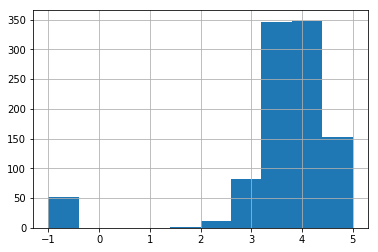

In [16]:
df.Rating.hist()

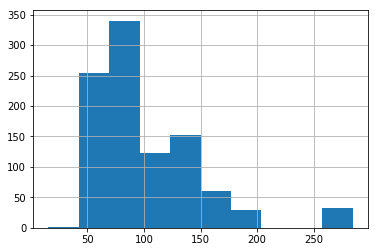

In [17]:
df.avg_salary.hist()

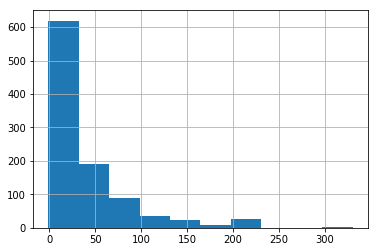

In [18]:
df.age.hist()

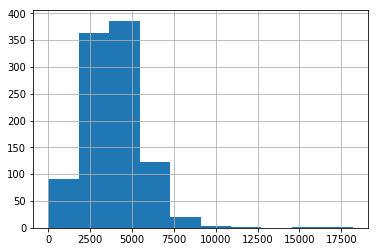

In [19]:
df.desc_len.hist()

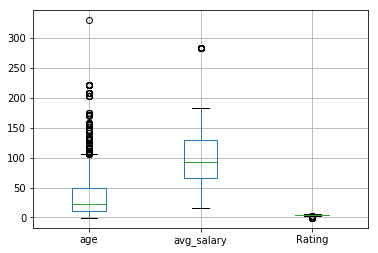

In [20]:
df.boxplot(column = ['age','avg_salary','Rating'])

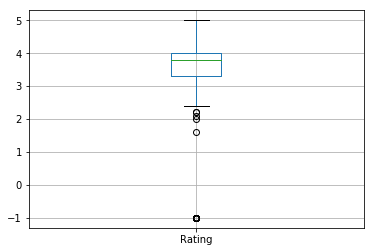

In [21]:
df.boxplot(column = 'Rating')

In [22]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.007939,0.128726,0.103739
avg_salary,0.007939,1.000000,-0.004850,0.000410
Rating,0.128726,-0.004850,1.000000,0.003402
desc_len,0.103739,0.000410,0.003402,1.000000


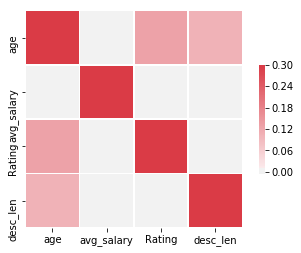

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A weak and non-negligible correlation between desc_len and age, and between Rating and age.

In [24]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'job_simp', 'seniority']]

graph for Location: total = 232


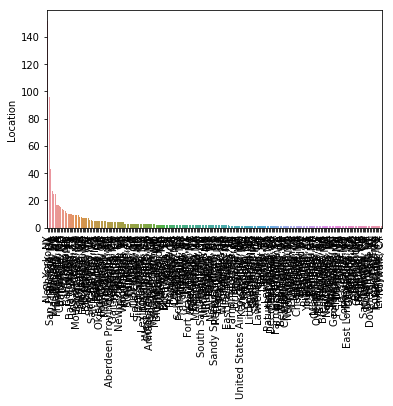

graph for Size: total = 9


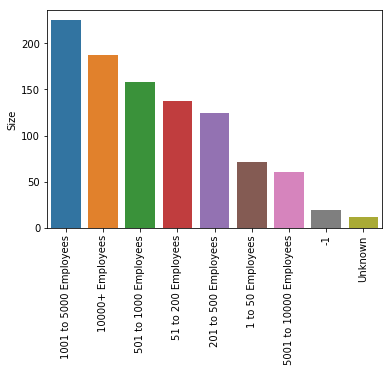

graph for Type of ownership: total = 12


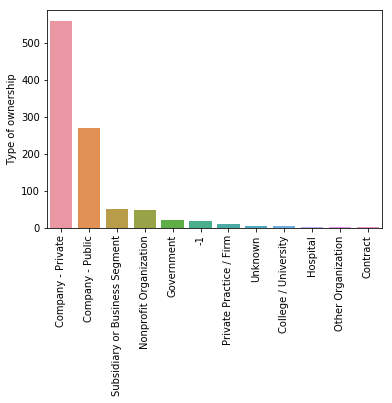

graph for Industry: total = 70


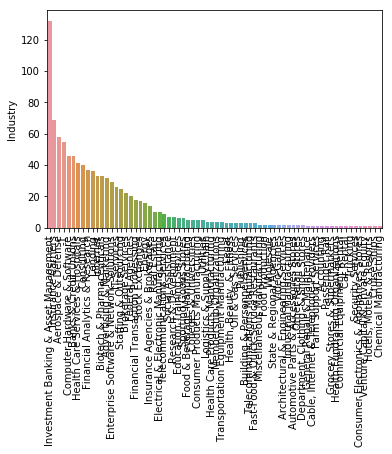

graph for Sector: total = 24


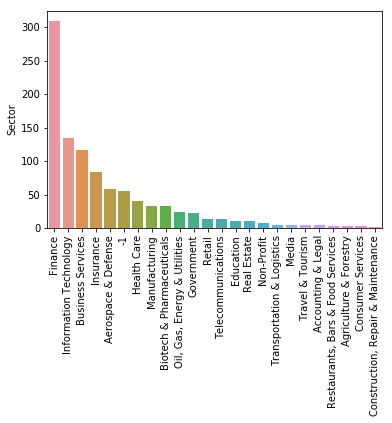

graph for Revenue: total = 14


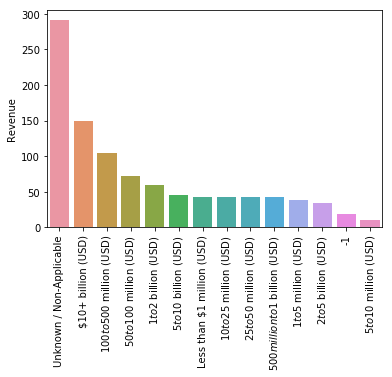

graph for company_txt: total = 481


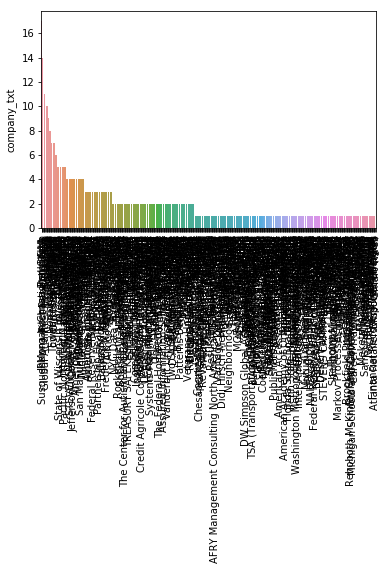

graph for job_state: total = 42


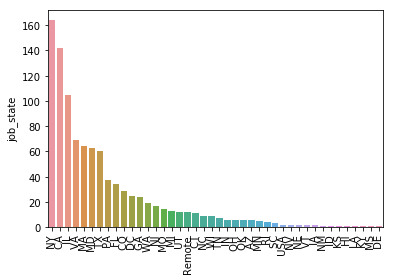

graph for python_yn: total = 2


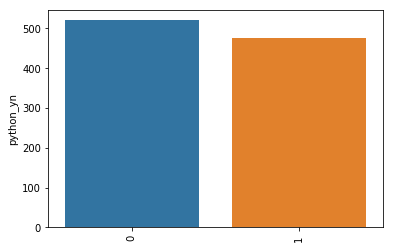

graph for R_yn: total = 2


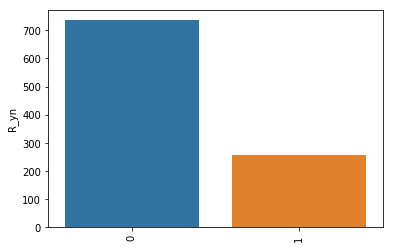

graph for spark: total = 2


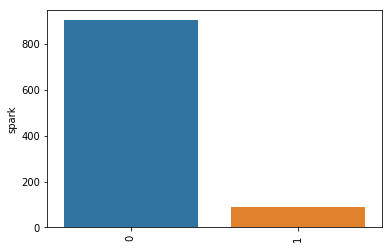

graph for aws: total = 2


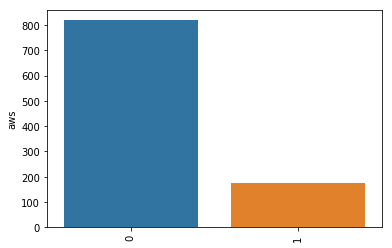

graph for excel: total = 2


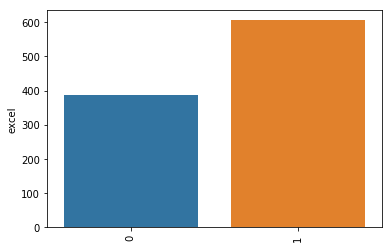

graph for mathematics: total = 2


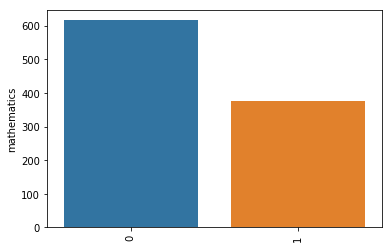

graph for finance: total = 2


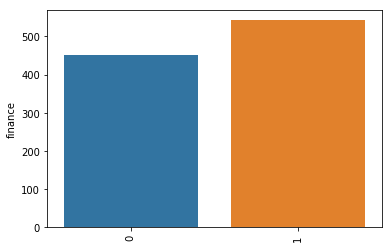

graph for modeling: total = 2


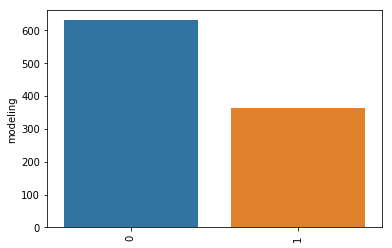

graph for statistics: total = 2


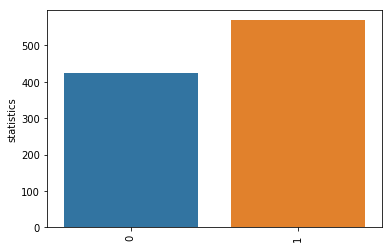

graph for vba: total = 2


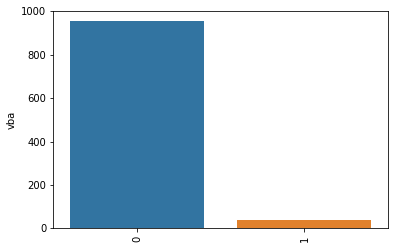

graph for C++: total = 2


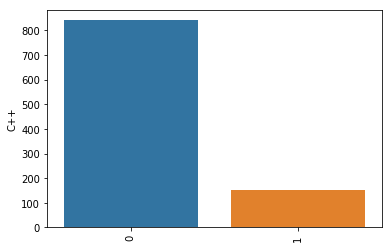

graph for portfolio_theory: total = 2


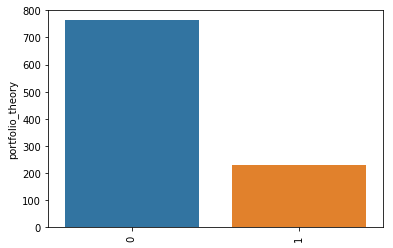

graph for derivatives: total = 2


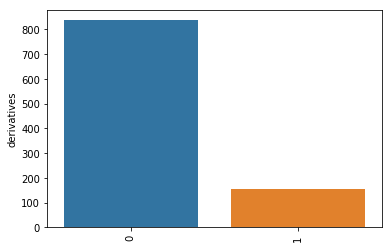

graph for trading: total = 2


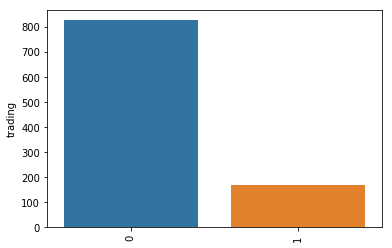

graph for data_science: total = 2


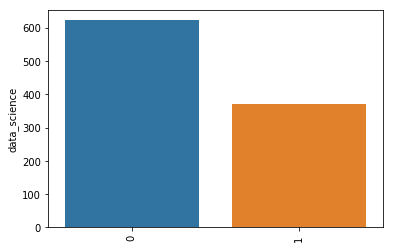

graph for sql: total = 2


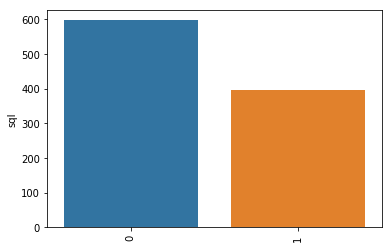

graph for job_simp: total = 7


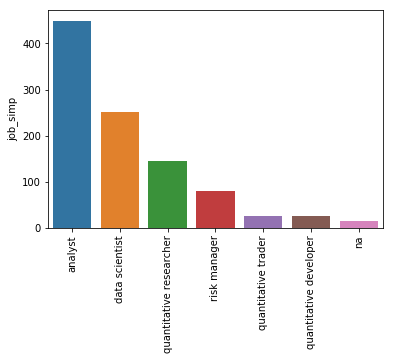

graph for seniority: total = 3


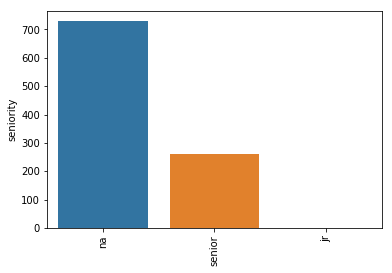

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


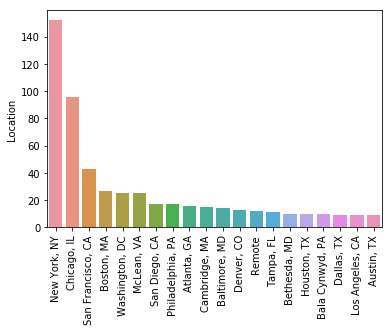

graph for company_txt: total = 20


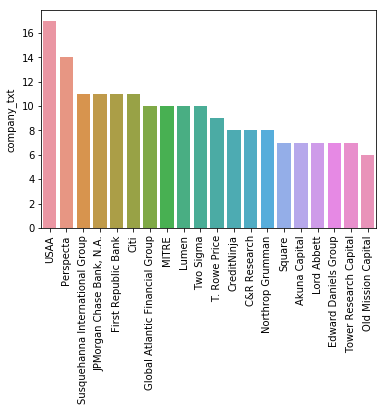

In [27]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [28]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,102.982183
data scientist,100.693227
na,102.906250
quantitative developer,101.600000
quantitative researcher,100.965753
quantitative trader,104.096154
risk manager,101.406250


In [30]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp                seniority            
analyst                 na         102.865079
                        senior     103.257463
data scientist          na          97.011429
                        senior     109.171053
na                      na         107.392857
                        senior      71.500000
quantitative developer  na         101.600000
quantitative researcher jr         130.000000
                        na         101.189516
                        senior      98.261905
quantitative trader     na         104.096154
risk manager            na         104.784314
                        senior      95.465517

In [31]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                           
Remote    data scientist           110.857143
          analyst                  103.500000
 WI       data scientist           131.500000
          analyst                  115.750000
 WA       data scientist            75.928571
          analyst                  106.291667
 VT       analyst                   95.750000
 VA       quantitative researcher   94.562500
          data scientist            99.234375
          analyst                  108.965517
 UT       analyst                  100.214286
          risk manager              89.000000
          data scientist           157.500000
 USA      analyst                   71.500000
 TX       risk manager              84.666667
          quantitative researcher   89.500000
          quantitative developer   101.000000
          na                        89.500000
          data scientist           101.500000
          analyst                  108.277778
 TN       risk manager              61.500000
          data scientist            88.875000
          analyst                  102.250000
 SC       analyst                   73.833333
 RI       data scientist           126.250000
          analyst                  165.500000
 PA       data scientist            83.916667
          analyst                  112.066667
          quantitative researcher   95.866667
          risk manager              82.000000
...                                       ...
 ID       analyst                   61.500000
 IA       data scientist           112.750000
 HI       risk manager              81.500000
 GA       risk manager             119.500000
          quantitative researcher  114.666667
          data scientist            78.000000
          analyst                  113.115385
 FL       risk manager             139.500000
          quantitative trader       98.500000
          data scientist            71.750000
          analyst                   77.000000
 DE       analyst                  131.500000
 DC       analyst                  151.333333
          data scientist           110.444444
          quantitative researcher   98.928571
 CT       risk manager             138.500000
          quantitative researcher   46.500000
          data scientist            70.625000
          analyst                  103.750000
 CO       risk manager             183.500000
          data scientist           128.000000
          analyst                  103.500000
 CA       quantitative developer    62.500000
          data scientist           100.155172
          analyst                   98.348214
          quantitative researcher  104.653846
          risk manager              89.357143
 AZ       risk manager             284.500000
          data scientist           106.166667
          analyst                  190.750000

[113 rows x 1 columns]

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                           
Remote    data scientist                    7
          analyst                           5
 WI       data scientist                    1
          analyst                           8
 WA       data scientist                    7
          analyst                          12
 VT       analyst                           2
 VA       quantitative researcher           8
          data scientist                   32
          analyst                          29
 UT       analyst                           7
          risk manager                      2
          data scientist                    3
 USA      analyst                           2
 TX       risk manager                     15
          quantitative researcher           2
          quantitative developer            1
          na                                2
          data scientist                   13
          analyst                          27
 TN       risk manager                      1
          data scientist                    4
          analyst                           2
 SC       analyst                           3
 RI       data scientist                    2
          analyst                           2
 PA       data scientist                    6
          analyst                          15
          quantitative researcher          15
          risk manager                      1
 OK       data scientist                    5
          analyst                           1
 OH       quantitative researcher           1
          data scientist                    1
          analyst                           4
 NY       analyst                          57
          quantitative developer           13
          na                               11
          data scientist                   11
          quantitative researcher          51
          quantitative trader               8
          risk manager                     13
 NV       analyst                           2
 NM       analyst                           1
 NJ       data scientist                    5
          analyst                          12
 NE       risk manager                      2
 NC       data scientist                    1
          analyst                           8
 MS       data scientist                    1
 MO       analyst                           5
          risk manager                      1
          quantitative researcher           1
          data scientist                    7
 MN       analyst                           3
          risk manager                      2
 MI       risk manager                      2
          data scientist                    2
          analyst                           7
          quantitative researcher           2
 MD       risk manager                      2
          quantitative researcher           6
          quantitative developer            1
          data scientist                   23
          analyst                          31
 MA       data scientist                   20
          na                                1
          analyst                          35
          quantitative developer            1
          quantitative researcher           4
          risk manager                      3
 LA       quantitative researcher           1
 KY       analyst                           1
 KS       analyst                           1
 IN       data scientist                    2
          analyst                           4
 IL       quantitative developer            8
          data scientist                   10
          na                                2
          analyst                          31
          quantitative researcher          31
          quantitative trader              13
          risk manager                     10
 ID       analyst                           1
 IA       data scientist                    2
 HI       risk manager           

In [34]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [35]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'mathematics', 'finance', 'modeling', 'statistics', 'vba',
       'C++', 'portfolio_theory', 'derivatives', 'trading', 'data_science',
       'sql', 'Type of ownership','avg_salary']]

In [37]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.0    284.500000
 2.7    165.500000
 4.9    126.833333
 4.6    123.250000
 2.8    120.666667
 1.6    119.500000
 2.9    115.111111
 3.3    114.960317
 3.2    114.727273
 4.1    113.538462
 5.0    111.479167
 3.1    111.277778
 3.5    110.500000
 3.9    102.754717
 3.7    101.307229
-1.0    100.894231
 4.3    100.515625
 4.8     99.281250
 4.0     98.638158
 3.0     98.500000
 4.7     97.323529
 4.4     96.264706
 3.8     95.124000
 3.4     94.944444
 4.5     93.237500
 3.6     91.973684
 4.2     91.956522
 2.6     86.500000
 2.5     82.000000
 2.1     81.500000
 2.4     72.416667
 2.2     53.250000
Industry
                                          avg_salary
Industry                                            
Farm Support Services                     284.500000
Department, Clothing, & Shoe Stores       213.750000
Health, Beauty, & Fitness                 213.166667
Logistics & Supply Chain                  176.250000
Publishing          

In [38]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),39,20
$1 to $5 million (USD),18,20
$10 to $25 million (USD),34,9
$10+ billion (USD),45,104
$100 to $500 million (USD),51,54
$2 to $5 billion (USD),20,14
$25 to $50 million (USD),32,10
$5 to $10 billion (USD),27,18
$5 to $10 million (USD),5,6


In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ossed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ossed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

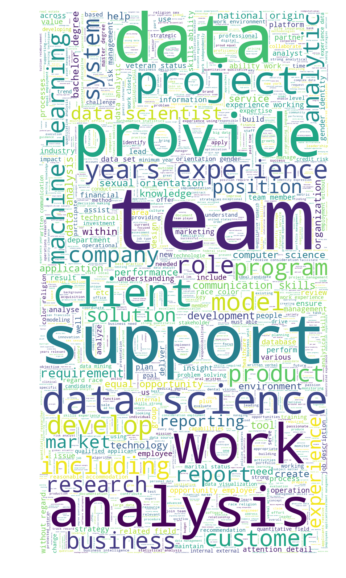

In [41]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
df.to_csv('data_eda.csv')